In [45]:
import numpy 
import scipy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 32
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'verdana', 'size':32})

In [46]:
name_add = '1037'#1040 
x = numpy.linspace(0, 1.65, num=50000)
change_zero_point = numpy.ones_like(x)
change_zero_point *= -145
T_0_cam = 1738 #1720

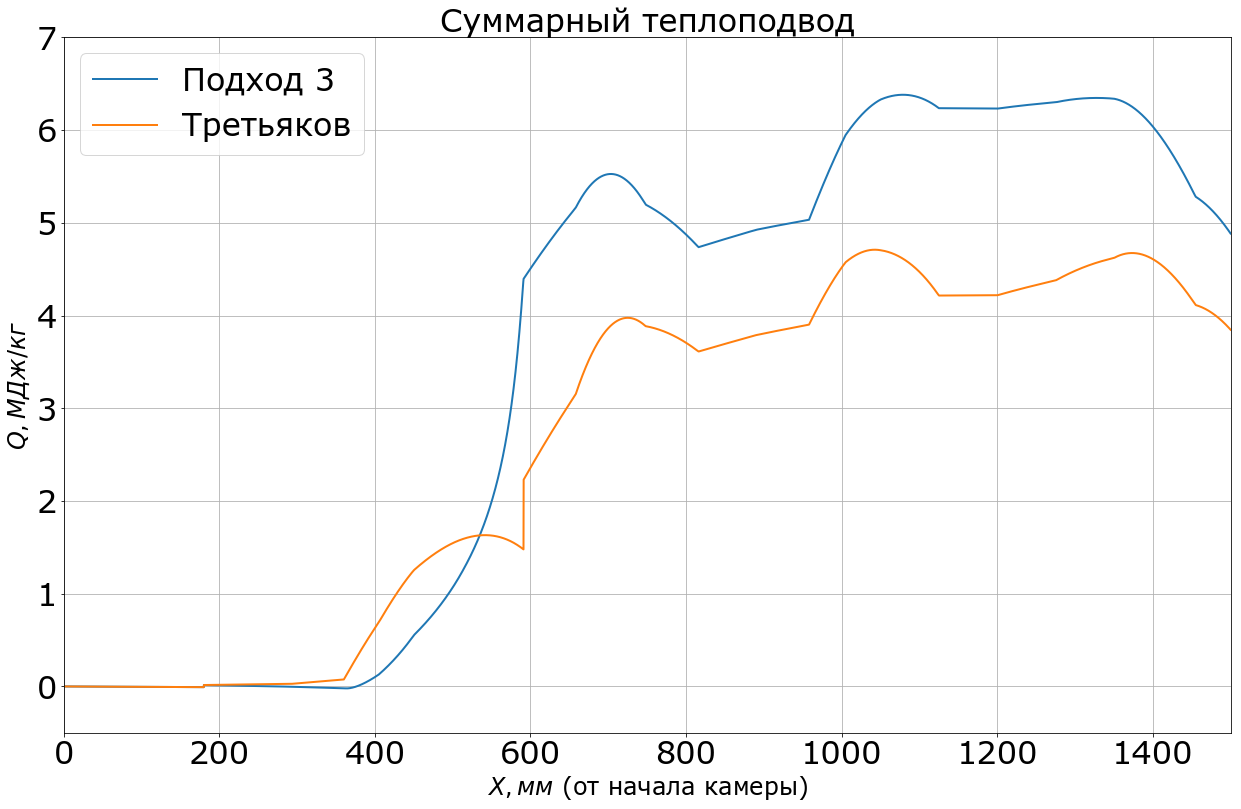

In [51]:
Q1 = numpy.loadtxt('Q(x)' + name_add + 'm3.txt')
Q2 = numpy.loadtxt('Q(x)' + name_add + 'mT.txt')
#q_cc = numpy.loadtxt('q_cc(x).txt')
#print(max(Q))
pyplot.figure(figsize=(18, 12))
pyplot.grid(True)
pyplot.xlim(0, 1500)
pyplot.ylim(-0.5, 7)
#pyplot.plot(x, u[1, :] / (1.3 * 287 * u[2, :]) ** 0.5);
#pyplot.plot(x, Q_add[:]/10**7);
HU_test = numpy.zeros_like(x)
#HU_test[1:]+=0.5* Hu / (1 + 2.7*14.5) * (Q_add[1:] - Q_add[:-1]) / h
#pyplot.plot(x, HU_test);
#u1=numpy.loadtxt('results_no_injection')
#pyplot.plot(x, u1[1, :] / (1.3 * 287 * u[2, :]) ** 0.5);
#pyplot.plot(x, u[2,:]);
pyplot.title('Cуммарный теплоподвод', fontsize=32)
pyplot.xlabel('$X, мм$ (от начала камеры)', fontsize=24)
pyplot.ylabel('$Q, MДж/кг$', fontsize=24)

pyplot.plot(x * 1000 + change_zero_point, Q1[0] * 1e-6, lw=2, label='Подход 3')
#pyplot.plot(x * 1000 + change_zero_point, Q1[1] * 1e-6, lw=2, label='теплоотвод от стенок')
#pyplot.plot(x * 1000 + change_zero_point, Q1[2] * 1e-6, lw=2, label='теплоподвод, связ. с реакциями')
pyplot.plot(x * 1000 + change_zero_point, Q2[0] * 1e-6, lw=2, label='Третьяков')
#pyplot.plot(x * 1000 + change_zero_point, Q2[1] * 1e-6, lw=2, label='теплоотвод от стенок')
#pyplot.plot(x * 1000 + change_zero_point, Q2[2] * 1e-6, lw=2, label='теплоподвод, связ. с реакциями')
pyplot.legend(loc='best')
#pyplot.plot(x, -622 * u[1, :] * u[3, :] * ((1 - .3/2*u[1, :]**2 / (1.3 * 287 * u[2, :]))* u[2, :] - 800) * Q[3]);
#pyplot.plot(x, - 2.5e7 * Q[3]);
#pyplot.plot(x, - 1.18e5*x**(4/5));
#pyplot.plot(x_cc, q_cc);
#pyplot.plot(x, Q[0] - Q[1]);
pyplot.tight_layout()
pyplot.savefig('Q(x)_hot_regime_run' + name_add + 'comp.png')

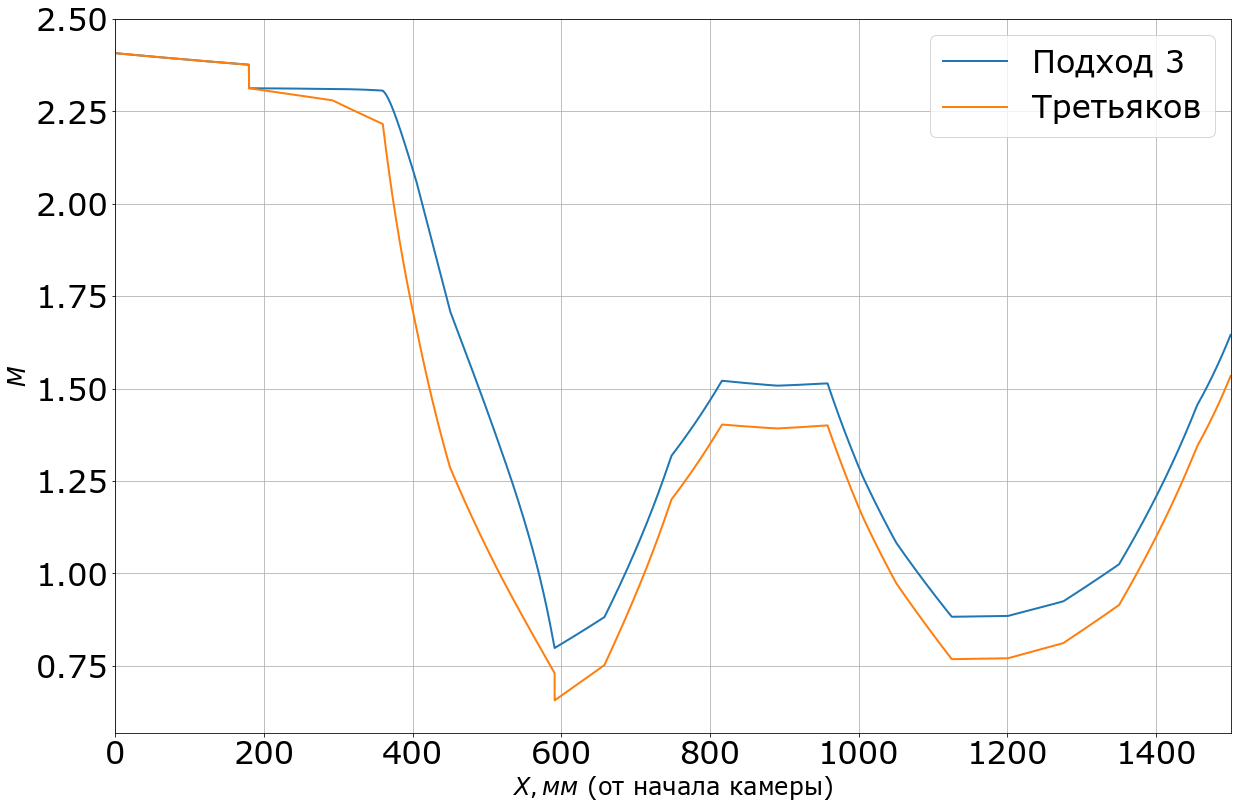

In [52]:
u1 = numpy.loadtxt('u_hot_regime_run' + name_add + 'm3.txt')
u2 = numpy.loadtxt('u_hot_regime_run' + name_add + 'mT.txt')
#u_cold = numpy.loadtxt('result_without_burn'+name_add+'.txt')
#u_cold_burn = numpy.loadtxt('result_cold_burn'+name_add+'.txt')

pyplot.figure(figsize=(18, 12))
pyplot.grid(True)
pyplot.xlim(0, 1500)
pyplot.plot(x * 1000 + change_zero_point, u1[1, :] / (1.3 * u1[0, :] / u1[3, :])**0.5, lw=2, label='Подход 3')
pyplot.plot(x * 1000 + change_zero_point, u2[1, :] / (1.3 * u2[0, :] / u2[3, :])**0.5, lw=2, label='Третьяков')
pyplot.xlabel('$X, мм$ (от начала камеры)', fontsize=24)
pyplot.ylabel('$M $', fontsize=24)
pyplot.legend(loc='best')
pyplot.tight_layout()
pyplot.savefig('M(x)_burn_regime_run' + name_add + 'comp.png')

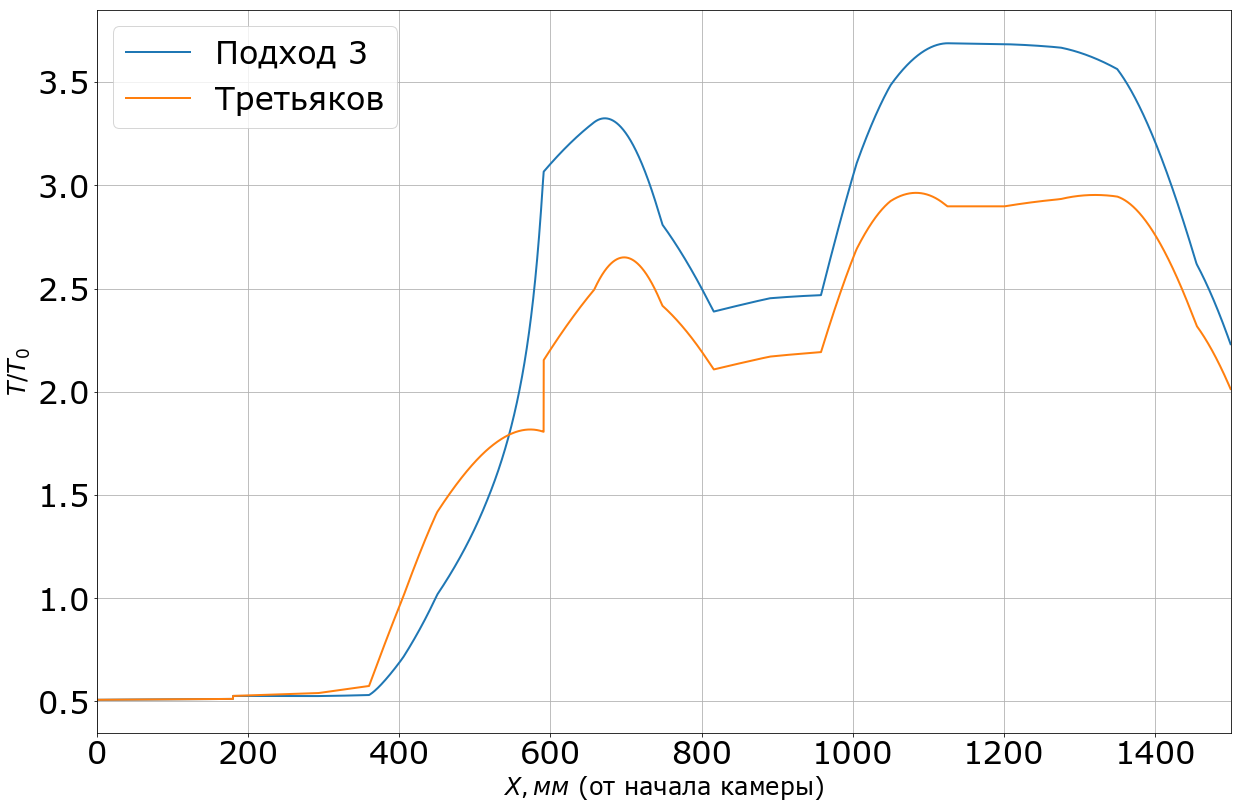

In [53]:
u1 = numpy.loadtxt('u_hot_regime_run' + name_add + 'm3.txt')
u2 = numpy.loadtxt('u_hot_regime_run' + name_add + 'mT.txt')
#u_cold = numpy.loadtxt('result_without_burn'+name_add+'.txt')
#u_cold_burn = numpy.loadtxt('result_cold_burn'+name_add+'.txt')
pyplot.figure(figsize=(18, 12))
pyplot.grid(True)
pyplot.xlim(0, 1500)
pyplot.plot(x * 1000 + change_zero_point, u1[2, :] / T_0_cam, lw=2, label='Подход 3')
pyplot.plot(x * 1000 + change_zero_point, u2[2, :] / T_0_cam, lw=2, label='Третьяков')
pyplot.xlabel('$X, мм$ (от начала камеры)', fontsize=24)
pyplot.ylabel('$Т/T_0$', fontsize=24)
pyplot.legend(loc='best')
pyplot.tight_layout()
pyplot.savefig('T(x)_burn_regime_run' + name_add + 'comp.png')

In [50]:
print(max(abs((Q1[0, 9500:] * 1e-6 - Q2[0, 9500:] * 1e-6) / (Q1[0, 9500:] * 1e-6))))
print(max(abs((u1[1, 9500:] / (1.3 * u1[0, 9500:] / u1[3, 9500:])**0.5 - u2[1, 9500:] / (1.3 * u2[0, 9500:] / u2[3, 9500:])**0.5) / (u1[1, 9500:] / (1.3 * u1[0, 9500:] / u1[3, 9500:])**0.5))))
print(max(abs((u1[2, 9500:] / T_0_cam - u2[2, 9500:] / T_0_cam) / (u1[2, 9500:] / T_0_cam))))

24389.376800984624
0.25961553561524
0.433656185224885
